In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

In [2]:
def HLA(L,p):
    N = L*L
    site = np.zeros((L+2,L+2),dtype = np.short)
    # -1 significa sitio vacio, 0 sitio por preguntar, 1 sitio lleno, 2 perimetro
    perx = np.array([],dtype = int)
    pery = np.array([],dtype = int)

    #Las paredes dentro de site
    for i in range(0,L+2): #bordes
        site[0,i] = -1
        site[i,0] = -1
        site[L+1,i] = -1
        site[i,L+1] = -1

    #desplazamiento a vecinos
    nx = np.array([1,0,-1,0])
    ny = np.array([0,1,0,-1])

    #Sitio inicial
    xseed = L//2
    yseed = L//2
    site[yseed,xseed] = 1
    xCluster = np.array([xseed])
    yCluster = np.array([yseed])
    Ncluster = 1   #numero de sitios pertenecientes al cluster

#Generación del primer perimetro
    for i in range(4):
        newperx = xseed + nx[i]
        newpery = yseed + ny[i]
        perx = np.append(perx,newperx)
        pery = np.append(pery,newpery)
        site[newperx,newpery] = 2

    Nper = 4 #numero de elementos del perimetro

    while Nper>0:
        indice = nr.randint(Nper)
        xnew = perx[indice]
        ynew = pery[indice]
        perx = np.delete(perx,indice)
        pery = np.delete(pery,indice)
        Nper -= 1

        escoger=np.random.random()
        if escoger < p:
            site[xnew,ynew]=1
            xCluster=np.append(xCluster,xnew)
            yCluster=np.append(yCluster,ynew)
            for i in range(4):
                newperx = xnew + nx[i]
                newpery = ynew + ny[i]
                if site[newperx,newpery]==0:
                    perx = np.append(perx,newperx)
                    pery = np.append(pery,newpery)
                    site[newperx,newpery] = 2
                    Nper +=1
        else:
            site[xnew,ynew]=-1
   
    return xCluster-1,yCluster-1


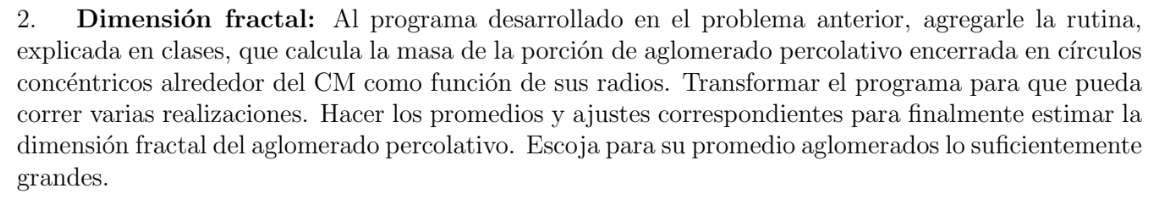

In [3]:
def MassDist(L,xCluster,yCluster):
    Ncluster = xCluster.size
    #Claculo del centro de masas
    xcm = xCluster[:Ncluster].mean()
    ycm = yCluster[:Ncluster].mean()
    dx = xCluster[:Ncluster] - xcm
    dy = yCluster[:Ncluster] - ycm
    dr = np.sqrt(dx*dx + dy*dy)
    massinside = []
    r = []
    imax=int(np.log2(L))
    for i in range(1,imax):
        massinside.append(dr[dr<=(2**i)].size)
        r.append(2**i)
    return np.array(r),np.array(massinside)

In [4]:
L=128
N=L**2
p=0.5927
muestras=100
M_mean=np.zeros(6) #i-1
i=0
while i<100:
    clusterx,clustery=HLA(L,p)
    
    if(clusterx.size>1000):
        r, M = MassDist(L,clusterx,clustery)
        M_mean+=M
        i+=1
promM= M_mean/muestras

print (promM,r)


[   6.75   26.74  101.97  406.13 1506.57 4144.55] [ 2  4  8 16 32 64]


In [5]:
def lineFit(x, y):
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [6]:
slope, corte=lineFit(np.log(r),np.log(promM))
error= np.abs((slope-1.89)/1.89)*100 #1.89 ya está por default

print("dim fractal= {}, error= {}%".format(round(slope,2),round(error,1)))



dim fractal= 1.88, error= 0.6%


Text(2, 1892.7, '$d_f=$ 1.88')

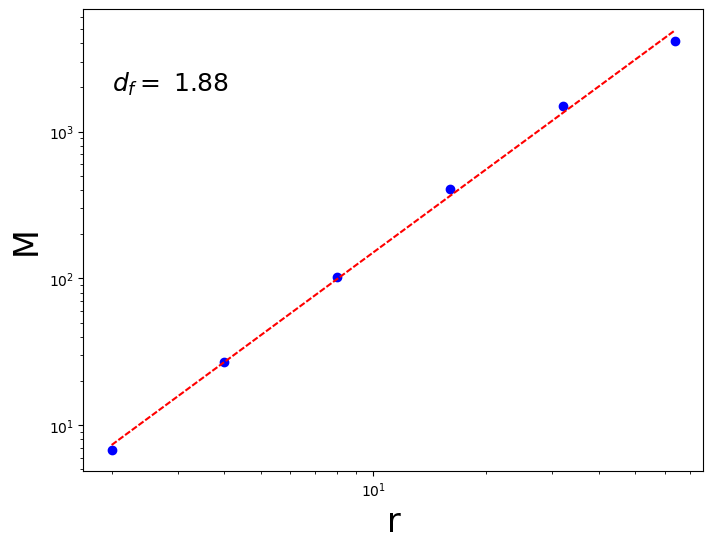

In [7]:
plt.figure(figsize=(8,6))
plt.loglog(r,promM,'bo')
plt.plot(r,np.exp(corte)*r**slope,color='red',dashes=(3,1))
plt.xlabel("r", fontsize=24)
plt.ylabel("M", fontsize=24)
plt.text(r.min(),0.9*M.max(), r'$d_f=$ {}'.format(round(slope,2)),fontsize=18)